**MACHINE LEARNING PORTFOLIO**

#Importing Libraries

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from matplotlib import pyplot as plt 
%matplotlib inline

import os
import tarfile
import urllib.request

#Inserting Dataset

In [ ]:
happinessDataSet = pd.read_csv("WorldHappiness.csv")
happinessDataSet

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


#Data Preparation & Visualisation

In [ ]:
happinessDataSet.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


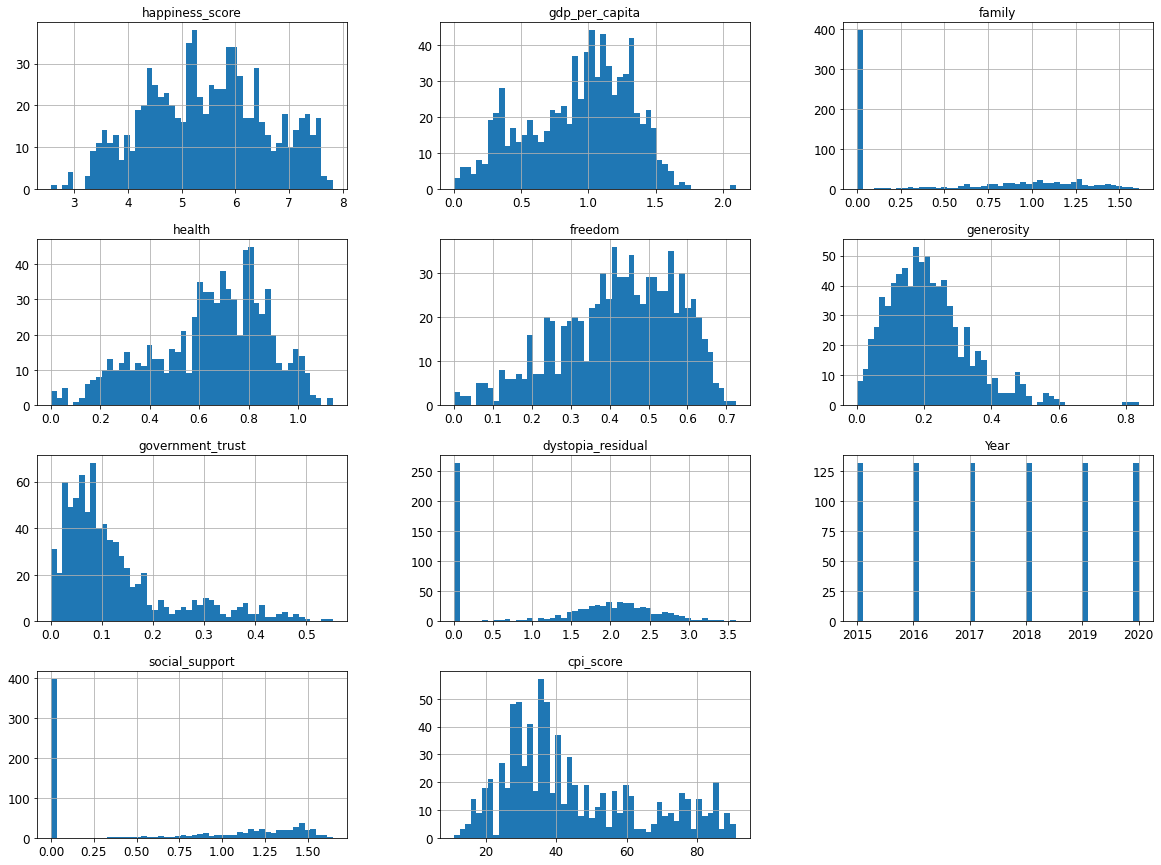

In [ ]:
happinessDataSet.hist(bins=50, figsize=(20,15))
plt.show()

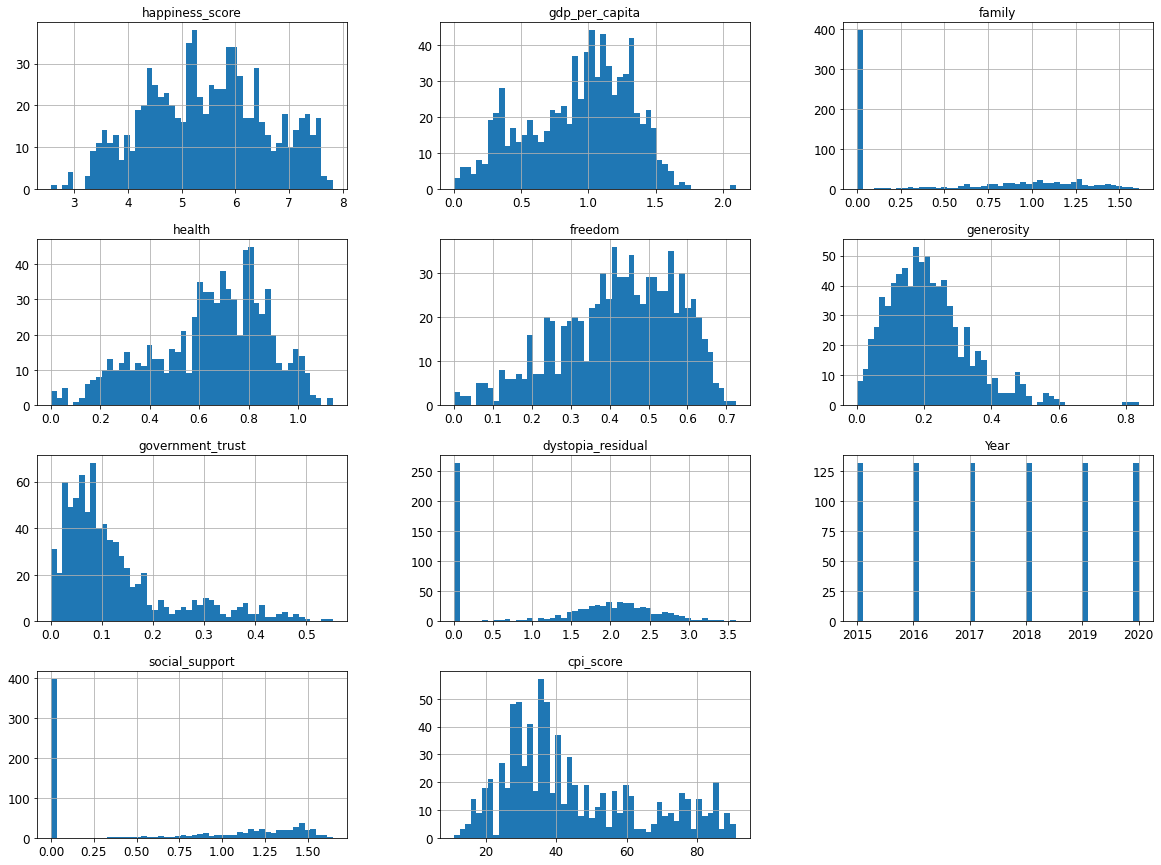

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
happinessDataSet.hist(bins=50, figsize=(20,15))
save_fig = ("attribute_histogram_plots")
plt.show()

In [ ]:
happinessDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [ ]:
corr_matrix = happinessDataSet.corr()
corr_matrix["cpi_score"].sort_values(ascending=False)

cpi_score            1.000000
gdp_per_capita       0.704483
happiness_score      0.693001
health               0.644478
government_trust     0.620089
freedom              0.482923
generosity           0.165972
family               0.132031
social_support       0.109077
dystopia_residual    0.032630
Year                -0.001460
Name: cpi_score, dtype: float64

In [ ]:
happinessDataSet["social_support"].value_counts()

0.000000    396
1.465000      3
1.504000      3
1.438000      3
1.538000      3
           ... 
1.483000      1
1.583000      1
1.433000      1
1.601000      1
0.356434      1
Name: social_support, Length: 360, dtype: int64

In [ ]:
happinessDataSet["dystopia_residual"].value_counts()

0.000000    264
2.684130      1
2.656140      1
2.519800      1
1.816570      1
           ... 
1.684350      1
2.246390      1
2.237410      1
2.742550      1
1.507236      1
Name: dystopia_residual, Length: 529, dtype: int64

In [ ]:
happinessDataSet["generosity"].value_counts()

0.000000    6
0.187000    5
0.153000    5
0.083000    4
0.099000    4
           ..
0.380860    1
0.152750    1
0.179220    1
0.119730    1
0.135235    1
Name: generosity, Length: 707, dtype: int64

In [ ]:
happinessDataSet["family"].value_counts()

0.000000    397
1.533524      1
1.172780      1
1.096100      1
1.134640      1
           ... 
0.945707      1
0.431883      1
0.791245      1
0.872118      1
0.234420      1
Name: family, Length: 396, dtype: int64

In [ ]:
happinessDataSet["Year"].value_counts()

2015    132
2016    132
2017    132
2018    132
2019    132
2020    132
Name: Year, dtype: int64

In [ ]:
happinessDataSet = happinessDataSet.drop("social_support", axis=1)
happinessDataSet = happinessDataSet.drop("dystopia_residual", axis=1)
happinessDataSet = happinessDataSet.drop("generosity", axis=1)
happinessDataSet = happinessDataSet.drop("family", axis=1)
happinessDataSet = happinessDataSet.drop("Year", axis=1)

In [ ]:
happinessDataSet

,Country,happiness_score,gdp_per_capita,health,freedom,government_trust,continent,cpi_score
0,Norway,7.5370,1.616463,0.796667,0.635423,0.315964,Europe,88
1,Denmark,7.5220,1.482383,0.792566,0.626007,0.400770,Europe,91
2,Iceland,7.5040,1.480633,0.833552,0.627163,0.153527,Europe,79
3,Switzerland,7.4940,1.564980,0.858131,0.620071,0.367007,Europe,86
4,Finland,7.4690,1.443572,0.809158,0.617951,0.382612,Europe,90
...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.494102,0.509089,0.101786,Africa,60
788,Tanzania,3.4762,0.457163,0.442678,0.509343,0.203881,Africa,38
789,Rwanda,3.3123,0.343243,0.572383,0.604088,0.485542,Africa,54
790,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.080929,Africa,24


In [ ]:
happinessDataSet.drop('continent',axis=1,inplace=True)
happinessDataSet

,Country,happiness_score,gdp_per_capita,health,freedom,government_trust,cpi_score
0,Norway,7.5370,1.616463,0.796667,0.635423,0.315964,88
1,Denmark,7.5220,1.482383,0.792566,0.626007,0.400770,91
2,Iceland,7.5040,1.480633,0.833552,0.627163,0.153527,79
3,Switzerland,7.4940,1.564980,0.858131,0.620071,0.367007,86
4,Finland,7.4690,1.443572,0.809158,0.617951,0.382612,90
...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.494102,0.509089,0.101786,60
788,Tanzania,3.4762,0.457163,0.442678,0.509343,0.203881,38
789,Rwanda,3.3123,0.343243,0.572383,0.604088,0.485542,54
790,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.080929,24


In [ ]:
ohe=pd.get_dummies(happinessDataSet['Country'])
ohe

,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
happinessDataSet = pd.concat([happinessDataSet, ohe], axis = 1)
happinessDataSet

,Country,happiness_score,gdp_per_capita,health,freedom,government_trust,cpi_score,Afghanistan,Albania,Algeria,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Norway,7.5370,1.616463,0.796667,0.635423,0.315964,88,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Denmark,7.5220,1.482383,0.792566,0.626007,0.400770,91,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Iceland,7.5040,1.480633,0.833552,0.627163,0.153527,79,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Switzerland,7.4940,1.564980,0.858131,0.620071,0.367007,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Finland,7.4690,1.443572,0.809158,0.617951,0.382612,90,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.494102,0.509089,0.101786,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,Tanzania,3.4762,0.457163,0.442678,0.509343,0.203881,38,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,Rwanda,3.3123,0.343243,0.572383,0.604088,0.485542,54,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,Zimbabwe,3.2992,0.425564,0.375038,0.377405,0.080929,24,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
happinessDataSet.drop('Country',axis=1,inplace=True)

#Clustering

In [ ]:
# running the kmeans algorithm, with 3 clusters
X_train = happinessDataSet.values
X = X_train
kmeans = KMeans(n_clusters=3,random_state=230)
kmeans = kmeans.fit(X)
print("The clusters are: ", kmeans.labels_)
print("The Inertia is: ", kmeans.inertia_)

The clusters are:  [1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 0 0 0 1 2 0 1 0 1 0 2 0 2 2 2 2
 2 0 0 0 2 0 2 0 1 2 0 2 0 2 0 0 0 2 0 2 2 1 0 0 2 0 0 0 2 2 2 2 0 0 0 0 0
 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 2 2 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 2 2 2 2 0 0 0 2 1 0 2 2 0 0 0 0 2 2 0 0 0 2
 2 2 0 0 0 2 0 0 0 2 1 0 0 2 0 0 0 0 2 2 0 0 2 2 2 2 0 0 0 0 0 0 2 0 2 0 0
 2 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2
 0 2 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 0 1 1 0 2 2 0 0 1 1 0
 2 0 2 2 0 2 0 2 0 0 0 2 2 0 0 0 2 1 2 2 1 0 0 0 2 0 0 2 0 0 0 2 0 0 2 0 2
 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 2 0 0 0 2 0 2 0 0 0 2 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 2 1 0 1 0 0 0 0 1 2 1 2 2 0 2 0 0 2 0 0 2 0 2 0 2 2 2 2
 1 2 2 0 0 2 0 1 0 0 0 0 0 2 0 0 0 2 2 0 2 0 0 2 2 2 0 0 2 0 0 0 2 0 0 0 0
 0 0 0

In [ ]:
y_pred = kmeans.predict(X_train)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0,

In [ ]:
y_pred is kmeans.labels_

False

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(kmeans.labels_,y_pred)

1.0

In [ ]:
# Inertia is a metric that shows how internally coherent clusters are.
# Finding the right number of k
no_of_clusters = range(2,15)
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    i = kmeans.inertia_
    inertia.append(i)
    print("The inertia for :", f, "Clusters is:", i)

The inertia for : 2 Clusters is: 74107.98506124716
The inertia for : 3 Clusters is: 37116.914547328925
The inertia for : 4 Clusters is: 20583.067055303545
The inertia for : 5 Clusters is: 15030.656642372396
The inertia for : 6 Clusters is: 10714.059726891508
The inertia for : 7 Clusters is: 7288.181149658918
The inertia for : 8 Clusters is: 5948.692822282179
The inertia for : 9 Clusters is: 5134.578706968583
The inertia for : 10 Clusters is: 4567.287826021766
The inertia for : 11 Clusters is: 3980.2803135563445
The inertia for : 12 Clusters is: 3602.637008877884
The inertia for : 13 Clusters is: 3260.868138075646
The inertia for : 14 Clusters is: 2935.4427165847273


Text(0.5, 1.0, 'Inertia Plot per k')

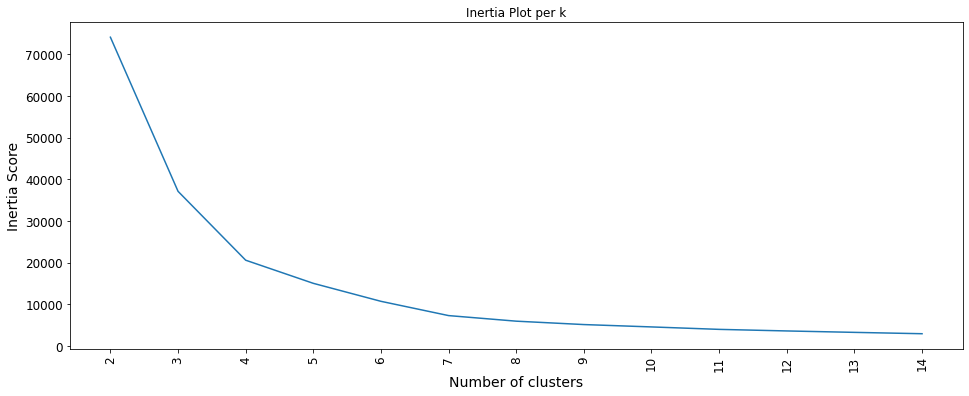

In [ ]:
import numpy as np
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xe = np.arange(len(no_of_clusters))
ax1.plot(xe, inertia)
ax1.set_xticks(xe)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [ ]:
# Running K means on 4b clusters

kmeans = KMeans(n_clusters=4, random_state=2)
kmeans = kmeans.fit(X_train)


kmeans.labels_

# "predictions" for new data
predictions = kmeans.predict(X_train)

# calculating the Counts of the cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1,4)

# Creating a datagrame
countcls = pd.DataFrame(counts, columns = ["Cluster 0","Cluster 1","Cluster 2", "Cluster 3"])

# display
countcls

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
0,261,130,264,137


In [ ]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       0, 0, 3, 1, 0, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2,
       0, 3, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 3, 0, 0, 2, 0, 2, 2, 1,
       1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 2, 3, 3, 3, 1, 3, 0,
       3, 2, 3, 1, 3, 2, 3, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 3, 0, 2, 2, 2,
       0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 3, 2, 2,
       2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0,
       3, 1, 0, 1, 1, 2, 2, 3, 3, 2, 1, 2, 1, 1, 0,

In [ ]:
predictions

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       0, 0, 3, 1, 0, 3, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 2,
       0, 3, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 3, 0, 0, 2, 0, 2, 2, 1,
       1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 0, 3, 2, 3, 3, 3, 1, 3, 0,
       3, 2, 3, 1, 3, 2, 3, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 3, 0, 2, 2, 2,
       0, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 3, 2, 2,
       2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 2, 2, 0, 1,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0,
       3, 1, 0, 1, 1, 2, 2, 3, 3, 2, 1, 2, 1, 1, 0,

In [ ]:
#Silhouette method
import sklearn.cluster as cluster
from sklearn import metrics
for i in range(3,13):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 3 is 0.5744034618049346
Silhouette score for k(clusters) = 4 is 0.5417629693627656
Silhouette score for k(clusters) = 5 is 0.5011185088766109
Silhouette score for k(clusters) = 6 is 0.518240889649985
Silhouette score for k(clusters) = 7 is 0.5176038215699501
Silhouette score for k(clusters) = 8 is 0.5005765893184938
Silhouette score for k(clusters) = 9 is 0.461966114889785
Silhouette score for k(clusters) = 10 is 0.44578279766962575
Silhouette score for k(clusters) = 11 is 0.41598409618826426
Silhouette score for k(clusters) = 12 is 0.4141206877733297


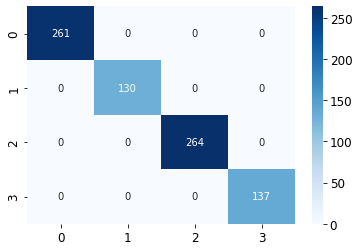

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(kmeans.labels_, predictions)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
X = happinessDataSet.values

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Hierarchichal Clustering, is a method of cluster analysis which seeks to build a hierarchy of clusters
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')

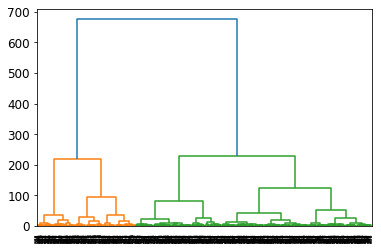

In [ ]:
import scipy.cluster.hierarchy as sch
hc.fit(X)
dendro = sch.dendrogram(sch.linkage(X,method = "ward", metric = "euclidean"))

In [ ]:
hclabel = hc.labels_
hclabel

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 3, 2, 1, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3, 2, 0,
       2, 1, 3, 0, 3, 0, 0, 0, 2, 2, 3, 0, 3, 3, 1, 0, 2, 0, 2, 0, 0, 3,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 3, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3,
       0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 3, 0, 2, 2, 2, 0, 2, 0, 3, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 3, 3, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 2, 3, 3, 2, 0, 0, 3, 0, 0, 2, 2, 0, 3, 0, 0, 2, 3, 1, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 3, 2, 3,
       0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 3, 0, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 2,
       1, 1, 2, 0, 3, 0, 0, 1, 1, 0, 0, 0, 0, 3, 2,

In [ ]:
from sklearn.preprocessing import StandardScaler
features=["happiness_score","gdp_per_capita","health","freedom","government_trust"]
X=happinessDataSet[features]
z=StandardScaler()
X[features]=z.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#SOFT CLUSTERING

In [ ]:
from sklearn.mixture import GaussianMixture
EM=GaussianMixture(n_components=3)
EM.fit(X)
cluster=EM.predict(X)
cluster_probability=EM.predict_proba(X)
cluster_probability

array([[9.13587779e-07, 9.99999086e-01, 9.92400779e-11],
       [4.25860700e-10, 1.00000000e+00, 3.49897703e-12],
       [1.01634472e-01, 8.98365511e-01, 1.68970035e-08],
       ...,
       [9.05956360e-14, 6.43612666e-47, 1.00000000e+00],
       [1.43596955e-02, 1.98308453e-35, 9.85640304e-01],
       [9.52766462e-04, 9.60927883e-58, 9.99047234e-01]])

In [ ]:
from sklearn.metrics import silhouette_score
#silhouette score is a metric used to calculate the goodness of a clustering technique(Min=-1, Max =+1)
silhouette_score(X,hclabel)

0.07032215044530978

In [ ]:
print("silhouette: ",silhouette_score(X,cluster))

silhouette:  0.34304987497951744


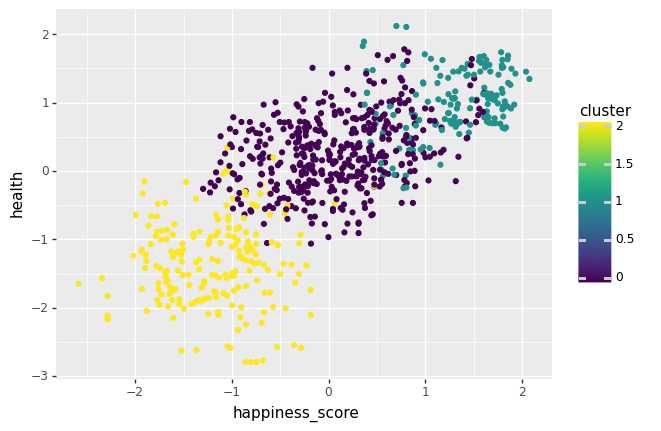

<ggplot: (8791045678585)>

In [ ]:
from plotnine import*
(ggplot(X,aes(x="happiness_score",y="health",color="cluster"))+geom_point())

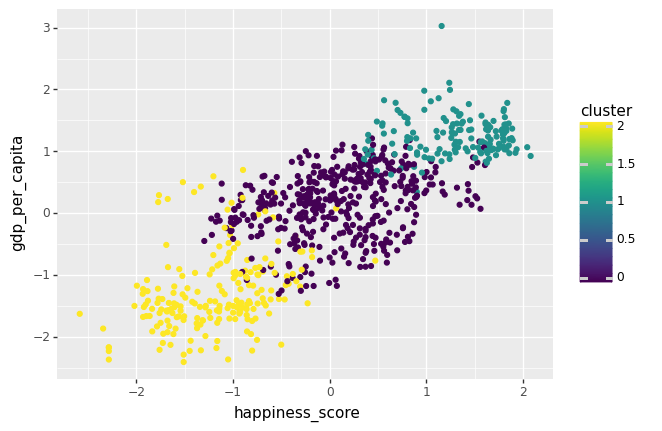

<ggplot: (8791045884429)>

In [ ]:
(ggplot(X,aes(x="happiness_score",y="gdp_per_capita",color="cluster"))+geom_point())

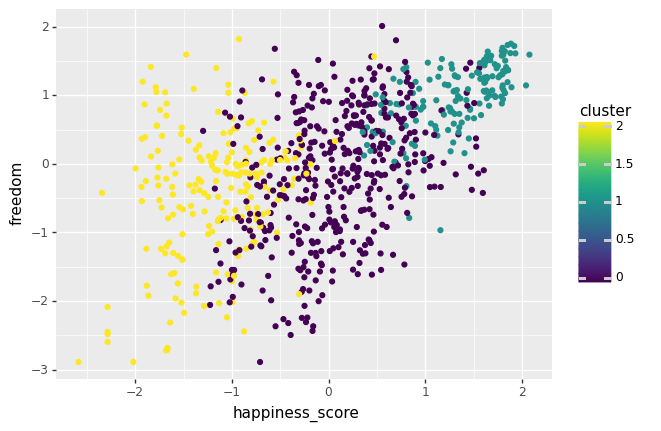

<ggplot: (8791048582969)>

In [ ]:
(ggplot(X,aes(x="happiness_score",y="freedom",color="cluster"))+geom_point())

In [ ]:
happinessDataSet["happiness_score"].min()

2.566900015

In [ ]:
happinessDataSet

,happiness_score,gdp_per_capita,health,freedom,government_trust,cpi_score,Afghanistan,Albania,Algeria,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,7.5370,1.616463,0.796667,0.635423,0.315964,88,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7.5220,1.482383,0.792566,0.626007,0.400770,91,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.5040,1.480633,0.833552,0.627163,0.153527,79,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7.4940,1.564980,0.858131,0.620071,0.367007,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.4690,1.443572,0.809158,0.617951,0.382612,90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,3.4789,0.997549,0.494102,0.509089,0.101786,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,3.4762,0.457163,0.442678,0.509343,0.203881,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,3.3123,0.343243,0.572383,0.604088,0.485542,54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,3.2992,0.425564,0.375038,0.377405,0.080929,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
happinessDataSet["happiness_score"] = pd.cut(x = happinessDataSet["happiness_score"], bins = [0,5,np.inf], labels = ["Sad", "Happy"])
happinessDataSet

,happiness_score,gdp_per_capita,health,freedom,government_trust,cpi_score,Afghanistan,Albania,Algeria,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,Happy,1.616463,0.796667,0.635423,0.315964,88,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Happy,1.482383,0.792566,0.626007,0.400770,91,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Happy,1.480633,0.833552,0.627163,0.153527,79,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Happy,1.564980,0.858131,0.620071,0.367007,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Happy,1.443572,0.809158,0.617951,0.382612,90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Sad,0.997549,0.494102,0.509089,0.101786,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,Sad,0.457163,0.442678,0.509343,0.203881,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,Sad,0.343243,0.572383,0.604088,0.485542,54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,Sad,0.425564,0.375038,0.377405,0.080929,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
happinessDataSet["happiness_score"] = happinessDataSet["happiness_score"].map({"Happy":1, "Sad":0})

In [ ]:
X = happinessDataSet.drop("happiness_score", axis = 1)

In [ ]:
y = happinessDataSet["happiness_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train

,gdp_per_capita,health,freedom,government_trust,cpi_score,Afghanistan,Albania,Algeria,Argentina,Armenia,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
70,1.081166,0.741416,0.472788,0.022794,37,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
344,0.801000,0.782000,0.418000,0.076000,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
632,0.522670,0.301470,0.405760,0.066860,28,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,1.092000,0.881000,0.471000,0.050000,39,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
340,0.696000,0.245000,0.426000,0.041000,27,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.726884,0.402048,0.235215,0.124348,30,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0.900597,0.637524,0.198303,0.026674,35,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
270,1.387000,1.009000,0.574000,0.373000,84,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
435,0.719000,0.605000,0.724000,0.259000,23,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y_train

70     1
344    1
632    0
306    1
340    1
      ..
71     1
106    0
270    1
435    1
102    0
Name: happiness_score, Length: 594, dtype: category
Categories (2, int64): [0 < 1]

#Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

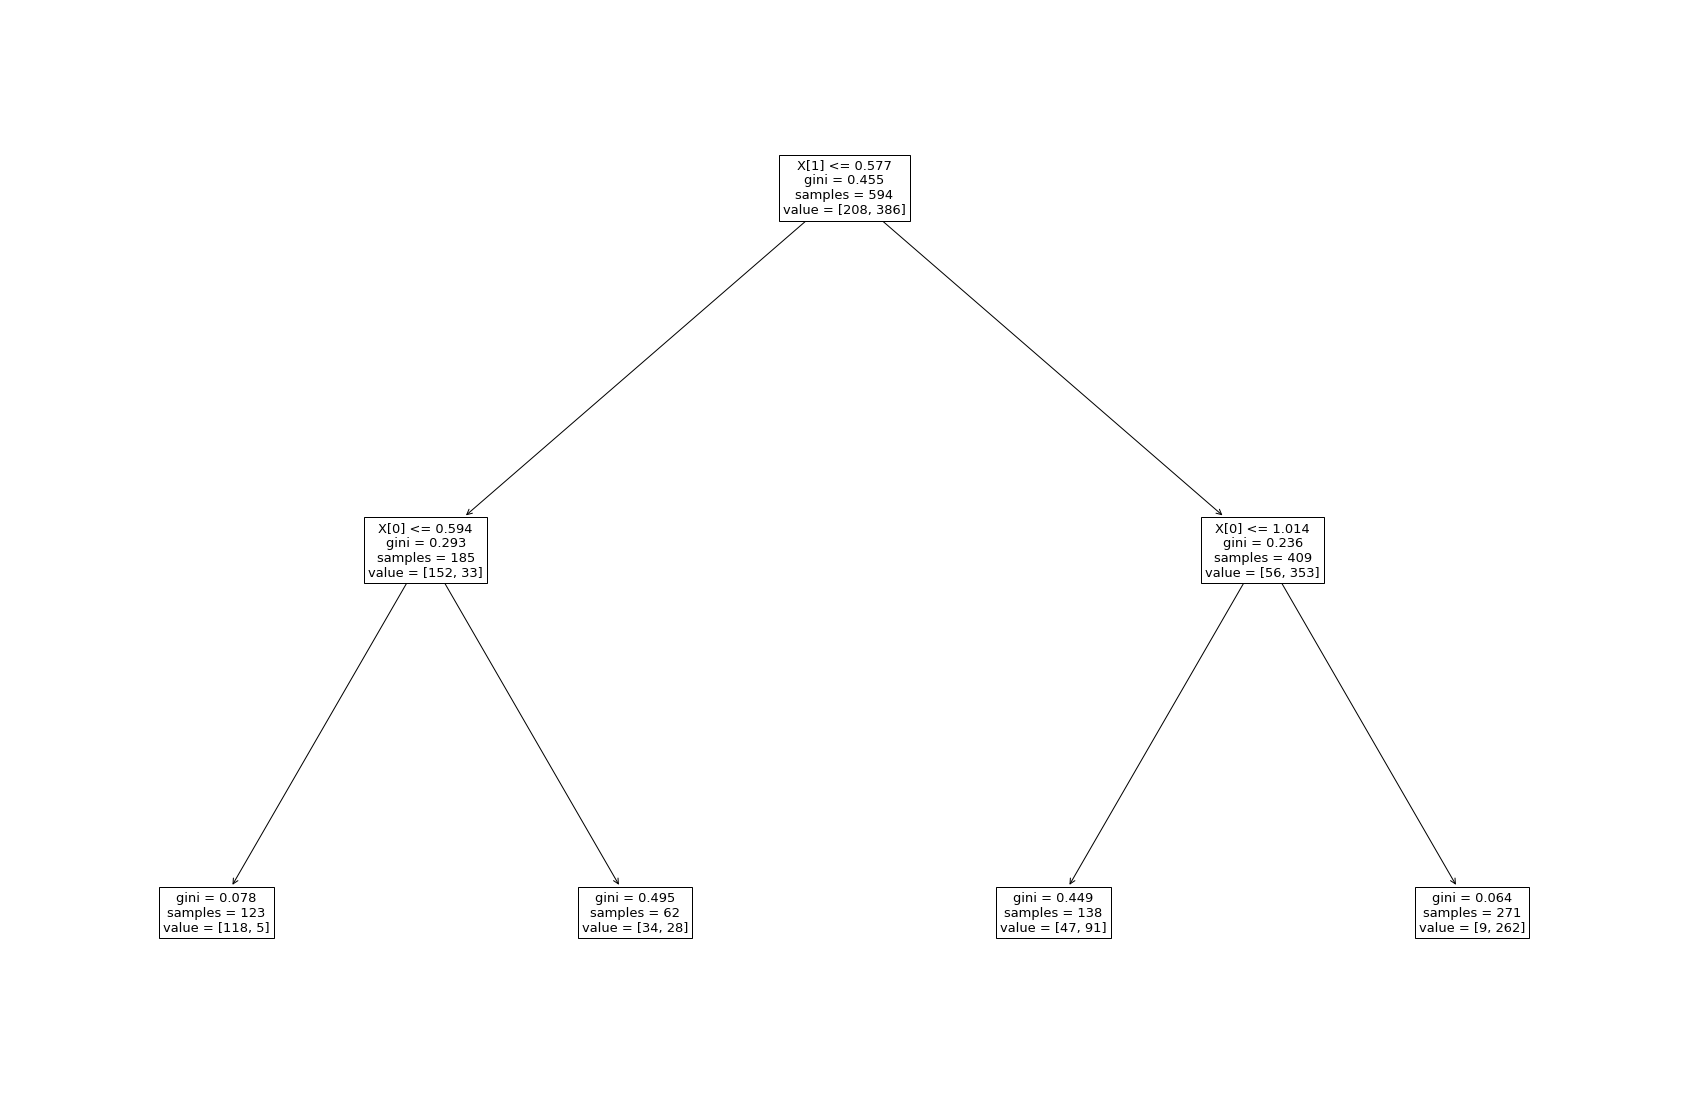

In [ ]:
plt.figure(figsize=(30,20))
plot_tree(tree_clf, fontsize=13);

In [ ]:
yPred = tree_clf.predict(X_train)
accuracy = accuracy_score(y_train, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.02%


#Confusion Matrix

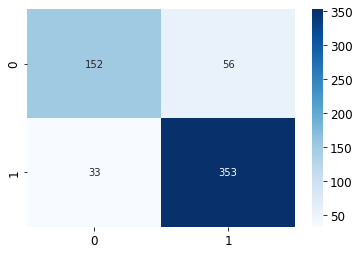

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_train,yPred)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, classification_report, log_loss,silhouette_score
print(classification_report(y_train, yPred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       208
           1       0.86      0.91      0.89       386

    accuracy                           0.85       594
   macro avg       0.84      0.82      0.83       594
weighted avg       0.85      0.85      0.85       594



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(tree_clf, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)

accuracy = np.mean(scores) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 83.34%


In [ ]:
yPred = tree_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 83.84%


In [ ]:
from sklearn.metrics import r2_score, explained_variance_score, classification_report, log_loss,silhouette_score
print(classification_report(y_test, yPred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        66
           1       0.88      0.88      0.88       132

    accuracy                           0.84       198
   macro avg       0.82      0.82      0.82       198
weighted avg       0.84      0.84      0.84       198



In [ ]:
# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [ ]:
%%time
# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

CPU times: user 1.86 s, sys: 8.55 ms, total: 1.87 s
Wall time: 2.43 s


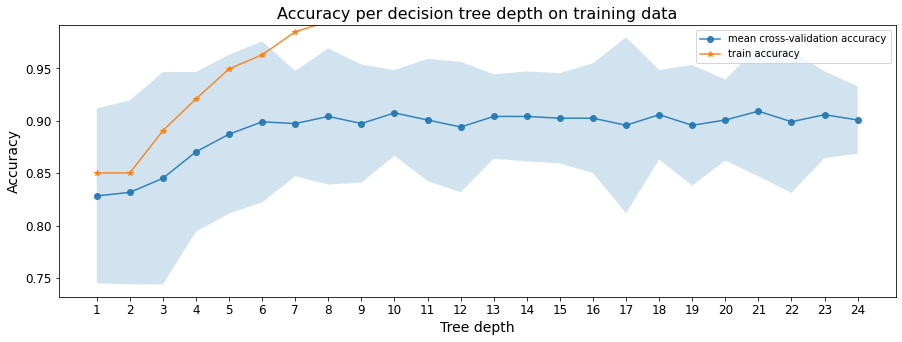

In [ ]:
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [ ]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-21 tree achieves the best mean cross-validation accuracy 90.91298 +/- 3.10865% on training dataset


In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    plot_tree(dt_classifier, fontsize=13)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    "max_depth": [2],
    "min_samples_leaf": [5, 10, 20, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [5, 10, 20, 50, 10]
}

grid_search = GridSearchCV(estimator=tree_clf, param_grid=params, cv=4,
                           n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [5, 10, 20, 50, 10]},
             scoring='accuracy', verbose=1)

In [ ]:
score_happinessDataSet = pd.DataFrame(grid_search.cv_results_)
score_happinessDataSet.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015340,0.003064,0.006671,0.003143,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
1,0.012909,0.003302,0.008043,0.003607,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
2,0.011946,0.006249,0.004766,0.000657,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
3,0.014060,0.001248,0.018231,0.006679,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
4,0.010710,0.003154,0.006548,0.003606,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1


In [ ]:
score_happinessDataSet.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015340,0.003064,0.006671,0.003143,gini,2,5,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
1,0.012909,0.003302,0.008043,0.003607,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
2,0.011946,0.006249,0.004766,0.000657,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
3,0.014060,0.001248,0.018231,0.006679,gini,2,5,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1
4,0.010710,0.003154,0.006548,0.003606,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.838926,0.899329,0.810811,0.831081,0.845037,0.032982,1


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [ ]:
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

# First matrix is for training data, second matrix is for test data
evaluate_model(dt_best)

Train Accuracy : 0.8501683501683501
Train Confusion Matrix:
[[152  56]
 [ 33 353]]
--------------------------------------------------
Test Accuracy : 0.8383838383838383
Test Confusion Matrix:
[[ 50  16]
 [ 16 116]]


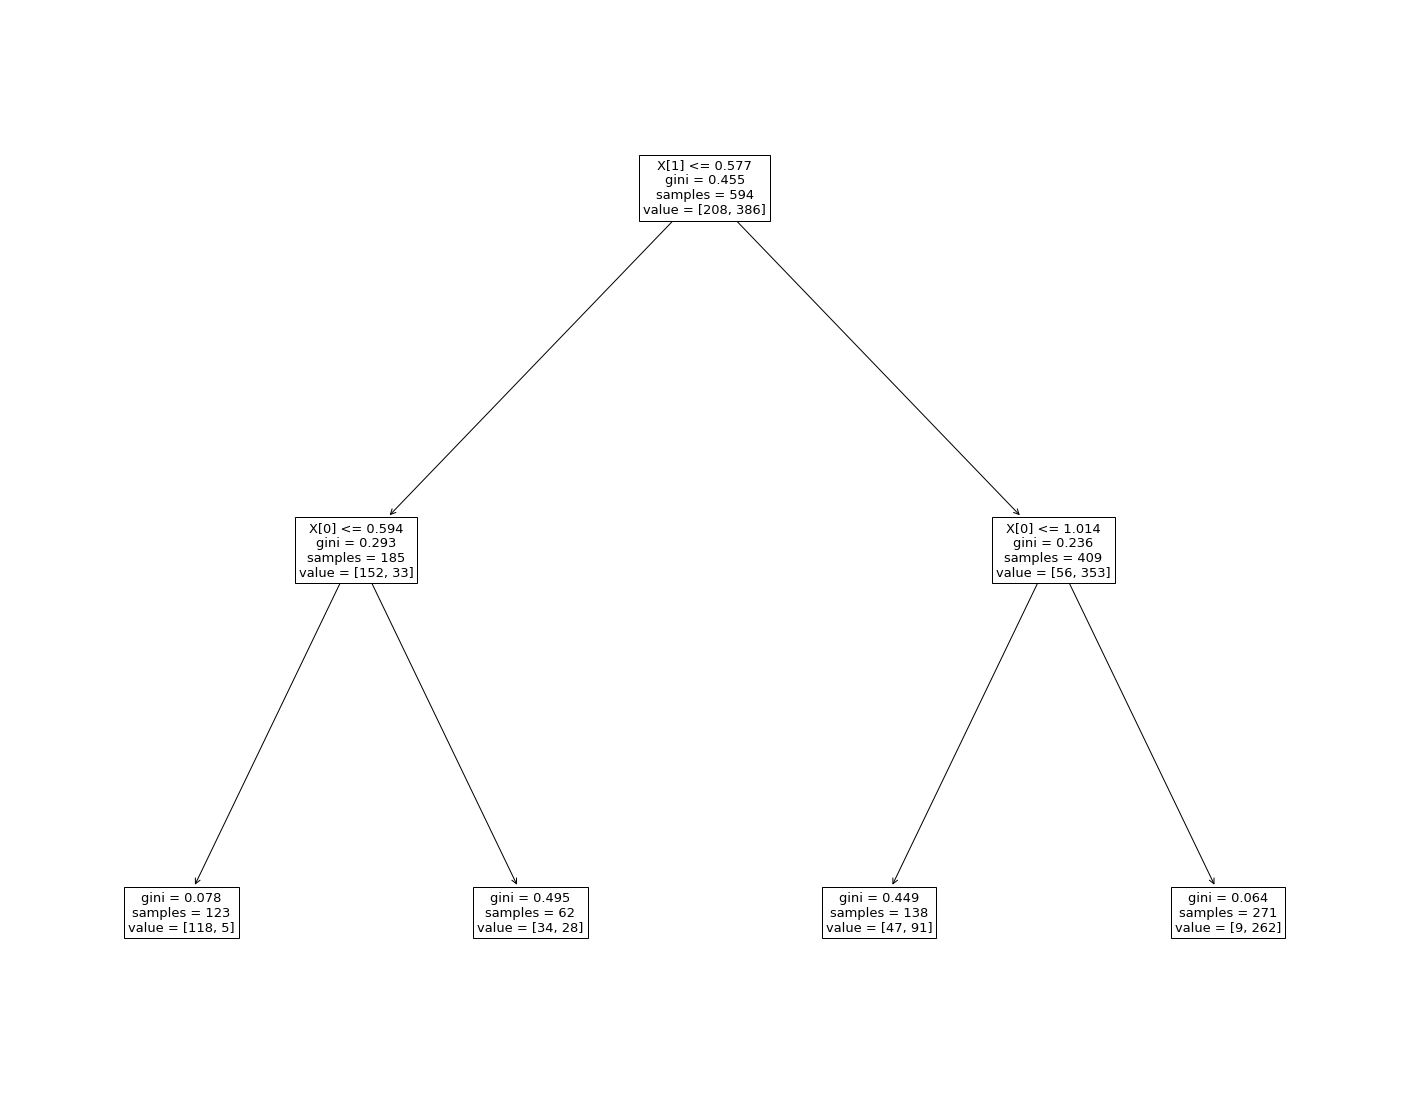

In [ ]:
get_dt_graph(dt_best)

In [ ]:
sizeX30 = int( 0.30 * X_train.shape[0] )
xTrain30 = X_train[0:sizeX30]
newXTrain = X_train[sizeX30:]
newXTest = np.append(X_test, xTrain30, axis=0)

sizeY30 = int( 0.30 * y_train.shape[0])
yTrain30 = y_train[0:sizeY30]
newYTrain = y_train[sizeY30:]
newYTest = np.append(y_test, yTrain30, axis=0)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(newXTrain, newYTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
yPred = tree_clf.predict(newXTrain)
accuracy = accuracy_score(newYTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 86.30%


In [ ]:
yPred = tree_clf.predict(newXTest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
accuracy = accuracy_score(newYTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 85.11%


In [ ]:
sizeX60 = int( 0.60 * X_train.shape[0] )
xTrain60 = X_train[0:sizeX60]
newXTrain = X_train[sizeX60:]
newXTest = np.append(X_test, xTrain60, axis=0)

sizeY60 = int( 0.60 * y_train.shape[0])
yTrain60 = y_train[0:sizeY60]
newYTrain = y_train[sizeY60:]
newYTest = np.append(y_test, yTrain60, axis=0)

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(newXTrain, newYTrain)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
yPred = tree_clf.predict(newXTrain)
accuracy = accuracy_score(newYTrain, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 82.35%


In [ ]:
yPred = tree_clf.predict(newXTest)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [ ]:
accuracy = accuracy_score(newYTest, yPred) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 83.57%


#Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [ ]:
happinessDataSet

,happiness_score,gdp_per_capita,health,freedom,government_trust,cpi_score,Afghanistan,Albania,Algeria,Argentina,...,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,1,1.616463,0.796667,0.635423,0.315964,88,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.482383,0.792566,0.626007,0.400770,91,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1.480633,0.833552,0.627163,0.153527,79,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.564980,0.858131,0.620071,0.367007,86,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.443572,0.809158,0.617951,0.382612,90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,0,0.997549,0.494102,0.509089,0.101786,60,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
788,0,0.457163,0.442678,0.509343,0.203881,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
789,0,0.343243,0.572383,0.604088,0.485542,54,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
790,0,0.425564,0.375038,0.377405,0.080929,24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X=happinessDataSet.drop("cpi_score",axis=1)
y=happinessDataSet["cpi_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

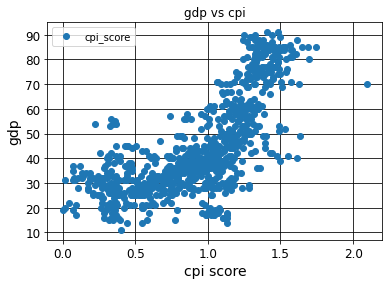

In [ ]:
# Plotting the distribution of scores
happinessDataSet.plot(x='gdp_per_capita', y='cpi_score', style='o')  
plt.title('gdp vs cpi')  
plt.xlabel('cpi score')  
plt.ylabel('gdp')  
plt.grid(color="black")
plt.show()

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train);

In [ ]:
linear.intercept_

40.17820749086932

In [ ]:
linear.coef_.shape

(137,)

In [ ]:
linear.coef_

array([  0.05529825,   3.28674438,   0.19739174,   2.63460103,
        -1.31996298, -25.33322553,  -8.05905762,  -9.06507981,
        -8.48095603,  -5.46760964,  31.65974637,  29.2760902 ,
       -15.3745141 ,  -3.00238433, -16.46084018,  -3.51616192,
        30.22185207,  -4.21721069, -11.9490793 ,  -6.83677324,
        16.57020594,  -7.58077636,  -2.3827996 ,  -1.34255025,
       -20.29349384, -23.1588537 , -17.58102477,  34.19265242,
       -21.79822812,  22.17360265,  -4.97937193,  -7.65757701,
        11.77337231,   3.50161315,  12.23871299,  43.63192698,
       -14.96517057,  -9.80991659,  -9.8711938 ,  -8.67268205,
        25.49997032,  -6.94636502,  40.99989243,  23.55572748,
       -11.88919645,  12.94511737,  34.43514942,  -0.57987057,
         2.84930277, -17.57407195, -15.06167299, -22.15325369,
       -14.44886065,   0.81364985,  30.11633734,  -3.92592973,
        -6.63262141, -17.53841853, -26.06807348,  27.19478874,
        15.85679827,   3.27850996,  -2.07819848,  27.54

In [ ]:
X.shape

(792, 137)

In [ ]:
y.shape

(792,)

#Gradient Dscent

In [ ]:
# stochastic gradient descent (SGD) learning
# the gradient of the loss is estimated each sample and
# is updated by decreasing learning rate

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

linear_clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
linear_clf.fit(X_train, y_train)

pred = linear_clf.predict(X_test)
predx = linear_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.16666666666666666
Training Accuracy:  0.3720538720538721


In [ ]:
happinessDataSet2=pd.DataFrame({'Actual':y_test,'Predicted':pred})
happinessDataSet2

,Actual,Predicted
694,49,50
528,87,91
598,34,34
606,44,45
120,11,16
...,...,...
158,69,69
69,33,37
394,36,36
131,21,22


In [ ]:
#Mean squared error
mean_squared_error(y_train, predx)

6.875420875420875

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_clf, X_train, y_train, cv=10)
scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.


array([0.13333333, 0.13333333, 0.2       , 0.2       , 0.13559322,
       0.11864407, 0.22033898, 0.13559322, 0.13559322, 0.20338983])

In [ ]:
rsme=(np.sqrt(mean_squared_error(y_train, predx)))
rsme

2.6221023769908136

In [ ]:
yPred = linear.predict(X_test)

In [ ]:
#Mean squared error
mean_squared_error(y_test, pred)

9.934343434343434

In [ ]:
# RMSE
rsme=(np.sqrt(mean_squared_error(y_test, pred)))
rsme

3.1518793495854873

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.29923e-17): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.62778e-17): result may not be accurate.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.77665e-17): result may not be accurate.


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.001}
-5.277192312375656


In [ ]:
prediction_ridge=ridge_regressor.predict(X_test)

In [ ]:
happinessDataSet2=pd.DataFrame({'Actual':y_test,'Predicted':prediction_ridge})
happinessDataSet2

,Actual,Predicted
694,49,50.215011
528,87,88.690450
598,34,34.603627
606,44,46.389316
120,11,15.490323
...,...,...
158,69,69.791250
69,33,36.266600
394,36,35.173507
131,21,19.511124


In [ ]:
X=happinessDataSet.drop("happiness_score",axis=1)

In [ ]:
y=happinessDataSet["happiness_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_train)
acc_score=accuracy_score(y_train,pred)
print("accuracy_score = ",acc_score)

accuracy_score =  0.9545454545454546


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cls=classification_report(y_train,pred)
print("classification_report \n",cls)

classification_report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       208
           1       0.95      0.98      0.97       386

    accuracy                           0.95       594
   macro avg       0.95      0.95      0.95       594
weighted avg       0.95      0.95      0.95       594



# Logistic regression with testing data


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

accuracy_score =  0.9646464646464646


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# Multi layer perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier()
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

accuracy_score =  0.9696969696969697


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
cls=classification_report(y_test,pred)
print("classification_report \n",cls)

classification_report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.98      0.98      0.98       132

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198



# Tweaking hyperparameters


In [ ]:
model3 = MLPClassifier(learning_rate = 'adaptive',activation='tanh')
model3.fit(X_train,y_train)
pred=model3.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

accuracy_score =  0.9595959595959596


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification


mlp_clf = MLPClassifier(random_state=1, max_iter=300, activation = "logistic", learning_rate_init = 0.008, 
                        momentum = 0.9, validation_fraction = 0.2).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9696969696969697
Training Accuracy:  0.9629629629629629


In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=450, activation = "logistic", learning_rate_init = 0.088, 
                        momentum = 0.9, validation_fraction = 0.25).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9646464646464646
Training Accuracy:  0.9612794612794613


In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=400, activation = "tanh", learning_rate_init = 0.05, 
                        momentum = 0.09, validation_fraction = 0.4).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9191919191919192
Training Accuracy:  0.9461279461279462


In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=270, activation = "identity", learning_rate_init = 0.09, 
                        momentum = 0.9, validation_fraction = 0.6).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9545454545454546
Training Accuracy:  0.9663299663299664


In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=100, activation = "logistic", learning_rate_init = 0.08,
                        momentum = 0.9, validation_fraction = 0.8).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9696969696969697
Training Accuracy:  0.968013468013468


In [ ]:
mlp_clf = MLPClassifier(random_state=1, max_iter=100, activation = "identity", learning_rate_init = 0.05,
                        momentum = 0.5, validation_fraction = 0.5).fit(X_train, y_train)

pred = mlp_clf.predict(X_test)
predx = mlp_clf.predict(X_train)

print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  0.9646464646464646
Training Accuracy:  0.9612794612794613


#### Moving 30% of training data to test data

In [ ]:
sizeX30 = int( 0.30 * X_train.shape[0] )
xTrain30 = X_train[0:sizeX30]
newXTrain = X_train[sizeX30:]
newXTest = np.append(X_test, xTrain30, axis=0)

sizeY30 = int( 0.30 * y_train.shape[0])
yTrain30 = y_train[0:sizeY30]
newYTrain = y_train[sizeY30:]
newYTest = np.append(y_test, yTrain30, axis=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier()
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

accuracy_score =  0.9595959595959596


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
cls=classification_report(y_test,pred)
print("classification_report \n",cls)

classification_report 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.98      0.96      0.97       132

    accuracy                           0.96       198
   macro avg       0.95      0.96      0.95       198
weighted avg       0.96      0.96      0.96       198



#### Moving 60% of data to test data

In [ ]:
sizeX60 = int( 0.60 * X_train.shape[0] )
xTrain60 = X_train[0:sizeX60]
newXTrain = X_train[sizeX60:]
newXTest = np.append(X_test, xTrain60, axis=0)

sizeY60 = int( 0.60 * y_train.shape[0])
yTrain60 = y_train[0:sizeY60]
newYTrain = y_train[sizeY60:]
newYTest = np.append(y_test, yTrain60, axis=0)

In [ ]:
from sklearn.neural_network import MLPClassifier
model2=MLPClassifier()
model2.fit(X_train,y_train)
pred=model2.predict(X_test)
acc_score=accuracy_score(y_test,pred)
print("accuracy_score = ",acc_score)

accuracy_score =  0.9696969696969697


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


In [ ]:
cls=classification_report(y_test,pred)
print("classification_report \n",cls)

classification_report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        66
           1       0.98      0.98      0.98       132

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198



In [ ]:
X=happinessDataSet.drop("happiness_score",axis=1)
y=happinessDataSet["happiness_score"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
from sklearn.neural_network import MLPClassifier

activ = ["identity","logistic","tanh","relu"]
solv = ["lbfgs","sgd","adam"]
lrn_rate = ["constant","invscaling","adaptive"]
lyr_size = [5,20,100,500]
momentum = [0.2,0.5,0.9]
val_frac = [0.1,0.5,0.9]
epochs = [200,500,1000,5000]

mlp_clf = MLPClassifier(random_state=1, max_iter=1000, hidden_layer_sizes=100, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
mlp_clf.fit(X_train, y_train)
mlp_clf.score(X_test, y_test)

0.9696969696969697

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


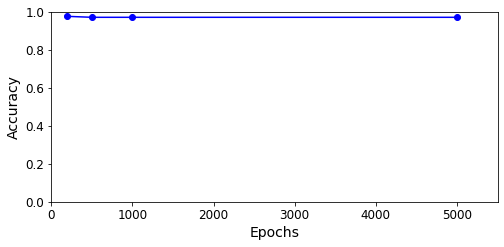

In [ ]:
scores = []
for x in epochs:
    mlp_clf = MLPClassifier(random_state=1, max_iter=x, hidden_layer_sizes=20, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(epochs, scores, "bo-")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(epochs)*1.1,0,1])
plt.show()   

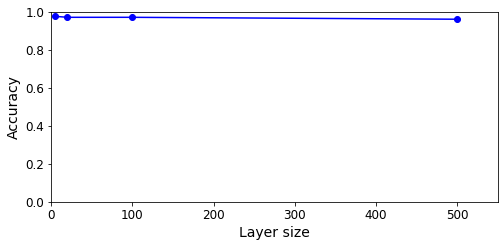

In [ ]:
# Layer size
scores1 = []
for x in lyr_size:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=x, activation="relu", learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores1.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(lyr_size, scores1, "bo-")
plt.xlabel("Layer size", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show() 

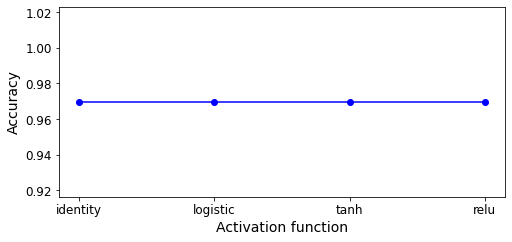

In [ ]:
# Activation functions
scores4 = []
for x in activ:
    mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=20, activation=x, learning_rate = "constant", momentum=0.9, validation_fraction=0.1)
    mlp_clf.fit(X_train, y_train)
    scores4.append(mlp_clf.score(X_test, y_test))

plt.figure(figsize=(8, 3.5))
plt.plot(activ, scores4, "bo-")
plt.xlabel("Activation function", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
#plt.axis([0,np.amax(lyr_size)*1.1,0,1])
plt.show()   

Learn rate =  constant Layer size =  5


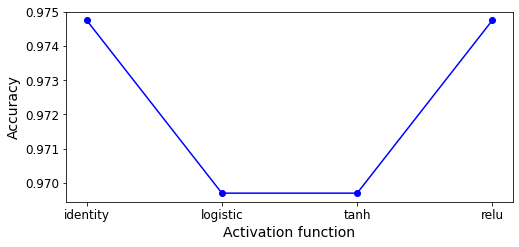

Learn rate =  constant Layer size =  20


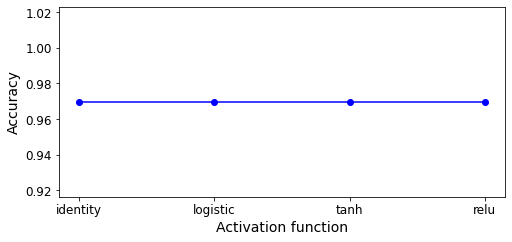

Learn rate =  constant Layer size =  100


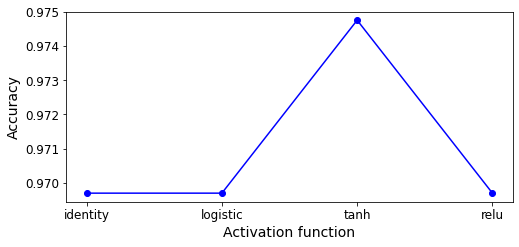

Learn rate =  constant Layer size =  500


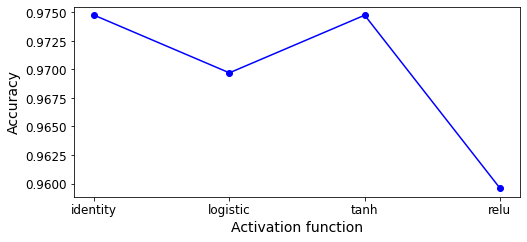

Learn rate =  invscaling Layer size =  5


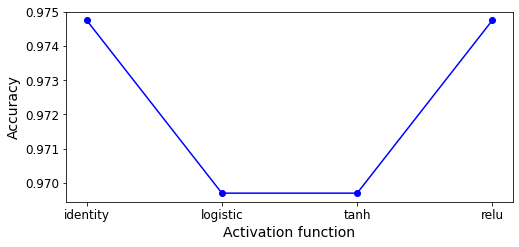

Learn rate =  invscaling Layer size =  20


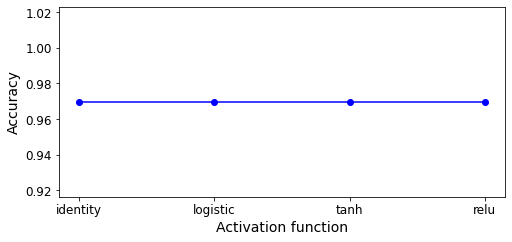

Learn rate =  invscaling Layer size =  100


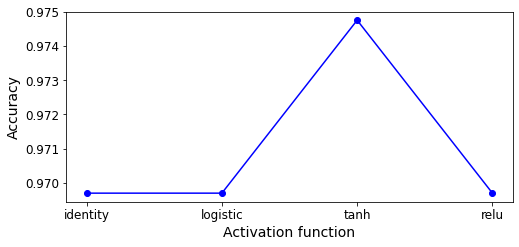

Learn rate =  invscaling Layer size =  500


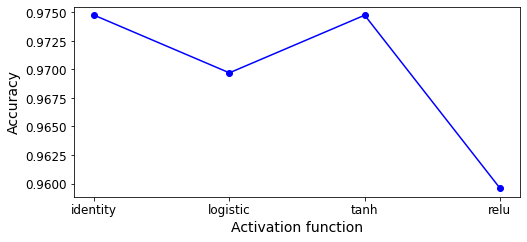

Learn rate =  adaptive Layer size =  5


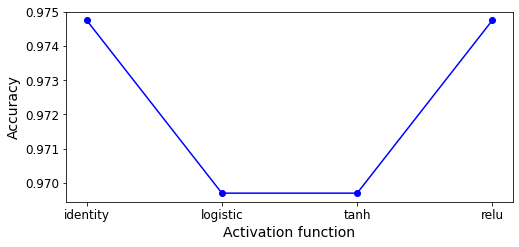

Learn rate =  adaptive Layer size =  20


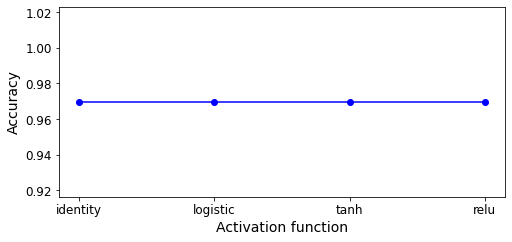

Learn rate =  adaptive Layer size =  100


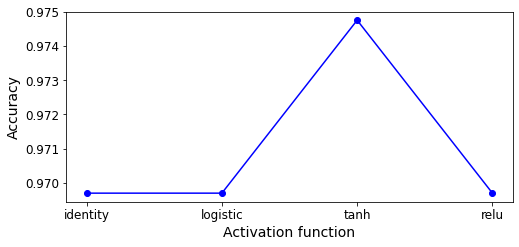

Learn rate =  adaptive Layer size =  500


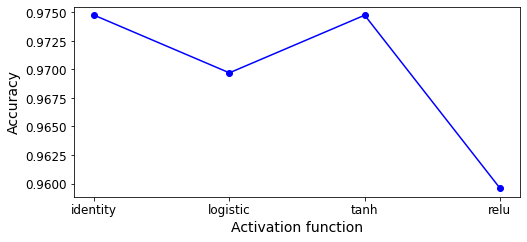

In [ ]:
for x in lrn_rate:
    for y in lyr_size:
        scores6 = []
        for z in activ:
            mlp_clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=y, activation=z, learning_rate = x, momentum=0.9, validation_fraction=0.1)
            mlp_clf.fit(X_train, y_train)
            scores6.append(mlp_clf.score(X_test, y_test))
            
        print("Learn rate = ", x, "Layer size = ", y)
        plt.figure(figsize=(8, 3.5))
        plt.plot(activ, scores6, "bo-")
        plt.xlabel("Activation function", fontsize=14)
        plt.ylabel("Accuracy", fontsize=14)
        #plt.axis([0,np.amax(lyr_size)*1.1,0,1])
        plt.show() 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

healthDataSet['state']=le.fit_transform(healthDataSet['state'])
healthDataSet
healthDataSet['county']=le.fit_transform(healthDataSet['county'])
healthDataSet

In [ ]:

corr_matrix = healthDataSet.corr()
corr_matrix["num_deaths"].sort_values(ascending=False)


In [ ]:
# if r > 0.9 (r < = -0.9) - Strong correlation
# else if  r >= 0.65 (r <= -0.65) - moderate correlation
# else  if  r >= 0.2 (r <= -0.2) -a weak correl


healthDataSet = healthDataSet.drop("population_density_per_sqmi", axis=1)
healthDataSet = healthDataSet.drop("percent_with_access_to_exercise_opportunities", axis=1)

#pd.set_option ('display.max_columns', None)
healthDataSet



In [ ]:
sample_incomplete_rows = healthDataSet[healthDataSet.isnull().any(axis=1)]
sample_incomplete_rows

In [ ]:
from sklearn.model_selection import train_test_split

y = healthDataSet["num_deaths"] 
X = healthDataSet[healthDataSet.columns.difference(["num_deaths"])] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
forest_clf.fit(X_train, y_train)
y_pred = forest_clf.predict(X_train)
accuracy_score(y_train, y_pred)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler_x = StandardScaler()
# X_train = scaler_x.fit_transform(X_train)
# X_test = scaler_x.transform(X_test)

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Gaussian Naive Bayes accuracy
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
# from sklearn.metrics import precision_score
# precision_score(y_test, y_pred)

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
plot_tree(tree_clf);

In [ ]:
#Decision Tree
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)

In [ ]:
cm[0][0]

In [ ]:
y_test

In [ ]:
y_pred.size

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
# a K-Means clusterer on my dataset. It will try to find each center and assign each instance to the closest:
#fit and predict Compute cluster centers and predict cluster index for each sample.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init="random", random_state=42).fit(X_train)
y_pred = kmeans.predict(X_test)

In [ ]:
#accuracy for Kmeans
from sklearn.metrics.cluster import rand_score
rand_score(y_test, y_pred)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred,average="weighted")

In [ ]:
# Gaussian Naive Bayes accuracy
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_pred)
cm

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)  
FP

In [ ]:
FN = cm.sum(axis=1) - np.diag(cm)
FN

In [ ]:
TP = np.diag(cm)
TP

In [ ]:
TN = cm.values.sum() - (FP + FN + TP)

In [ ]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=4, covariance_type='tied', max_iter=100,init_params="random")
gmm.fit(X_train)
yclust = gmm.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
rand_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import  accuracy_score
accuracy_score(y_test, y_pred)
rand_score(y_test, y_pred)

In [ ]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)